#  <p style="text-align: center;">Principal Component Analysis</p>
======================================================================================================================

### Overview
------------

Principle Component Analysis (PCA) is a dimensionality reduction technique used to transform high-dimensional data into lower-dimensional data while retaining most of the information.

### How it Works
-----------------

PCA works by identifying the directions of maximum variance in the data and projecting the data onto those directions.

### Steps
------------

1.  **Data Preprocessing**: The data is preprocessed to ensure it is in a suitable format for PCA. This includes handling missing values, scaling the data, and normalizing it.
2.  **Covariance Matrix Calculation**: The covariance matrix of the data is calculated to identify the directions of maximum variance.
3.  **Eigenvalue and Eigenvector Calculation**: The eigenvalues and eigenvectors of the covariance matrix are calculated. The eigenvectors represent the directions of maximum variance, and the eigenvalues represent the amount of variance explained by each eigenvector.
4.  **Component Selection**: The eigenvectors are sorted in descending order of their corresponding eigenvalues, and the top k eigenvectors are selected as the principal components.
5.  **Data Transformation**: The original data is projected onto the selected principal components to obtain the lower-dimensional representation of the data.
### Advantages
--------------

*   Reduces dimensionality of the data
*   Helps in visualizing high-dimensional data
*   Improves performance of machine learning models

### Disadvantages
----------------

*   Assumes linearity of the data
*   Sensitive to outliers and noise in the data

### Example Use Cases
---------------------

*   Image compression
*   Data preprocessing for machine learning models
*   Anomaly detection


Covariance Matrix Information
==========================

### Overview

A covariance matrix is a square matrix that summarizes the covariance between different variables in a multivariate distribution. It is a key concept in statistics and is used in various fields such as finance, engineering, and machine learning.

### Properties

*   The covariance matrix is symmetric, meaning that the covariance between variables `i` and `j` is the same as the covariance between variables `j` and `i`.
*   The diagonal elements of the covariance matrix represent the variance of each variable.
*   The off-diagonal elements represent the covariance between different variables.

### Interpretation

*   A positive covariance between two variables indicates that they tend to increase or decrease together.
*   A negative covariance indicates that one variable tends to increase when the other decreases.
*   A covariance of zero indicates that the variables are uncorrelated.

### Example

Suppose we have a dataset with two variables, `X` and `Y`. The covariance matrix for this dataset would be:

|  | X | Y |
| --- | --- | --- |
| X | Var(X) | Cov(X, Y) |
| Y | Cov(Y, X) | Var(Y) |

where `Var(X)` and `Var(Y)` are the variances of `X` and `Y`, respectively, and `Cov(X, Y)` is the covariance between `X` and `Y`.

### Calculation

The covariance matrix can be calculated using the following formula:

`Σ = (X - μ)(X - μ)^T / (n - 1)`

where `X` is the data matrix, `μ` is the mean vector, `n` is the number of observations, and `^T` denotes the transpose operator.

### Applications

*   Portfolio optimization: The covariance matrix is used to calculate the

In [21]:
!pip install matplotlib


Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [22]:
!pip install seaborn


Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
sns.set_theme(style='darkgrid')
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 200
%matplotlib inline


In [24]:
col = ['SL','SW','PL','PW','class']
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
                header=None, names=col)
df


,SL,SW,PL,PW,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica



# Understanding the distribution of data with 4D!

Text(0, 0.5, 'Petal Width')

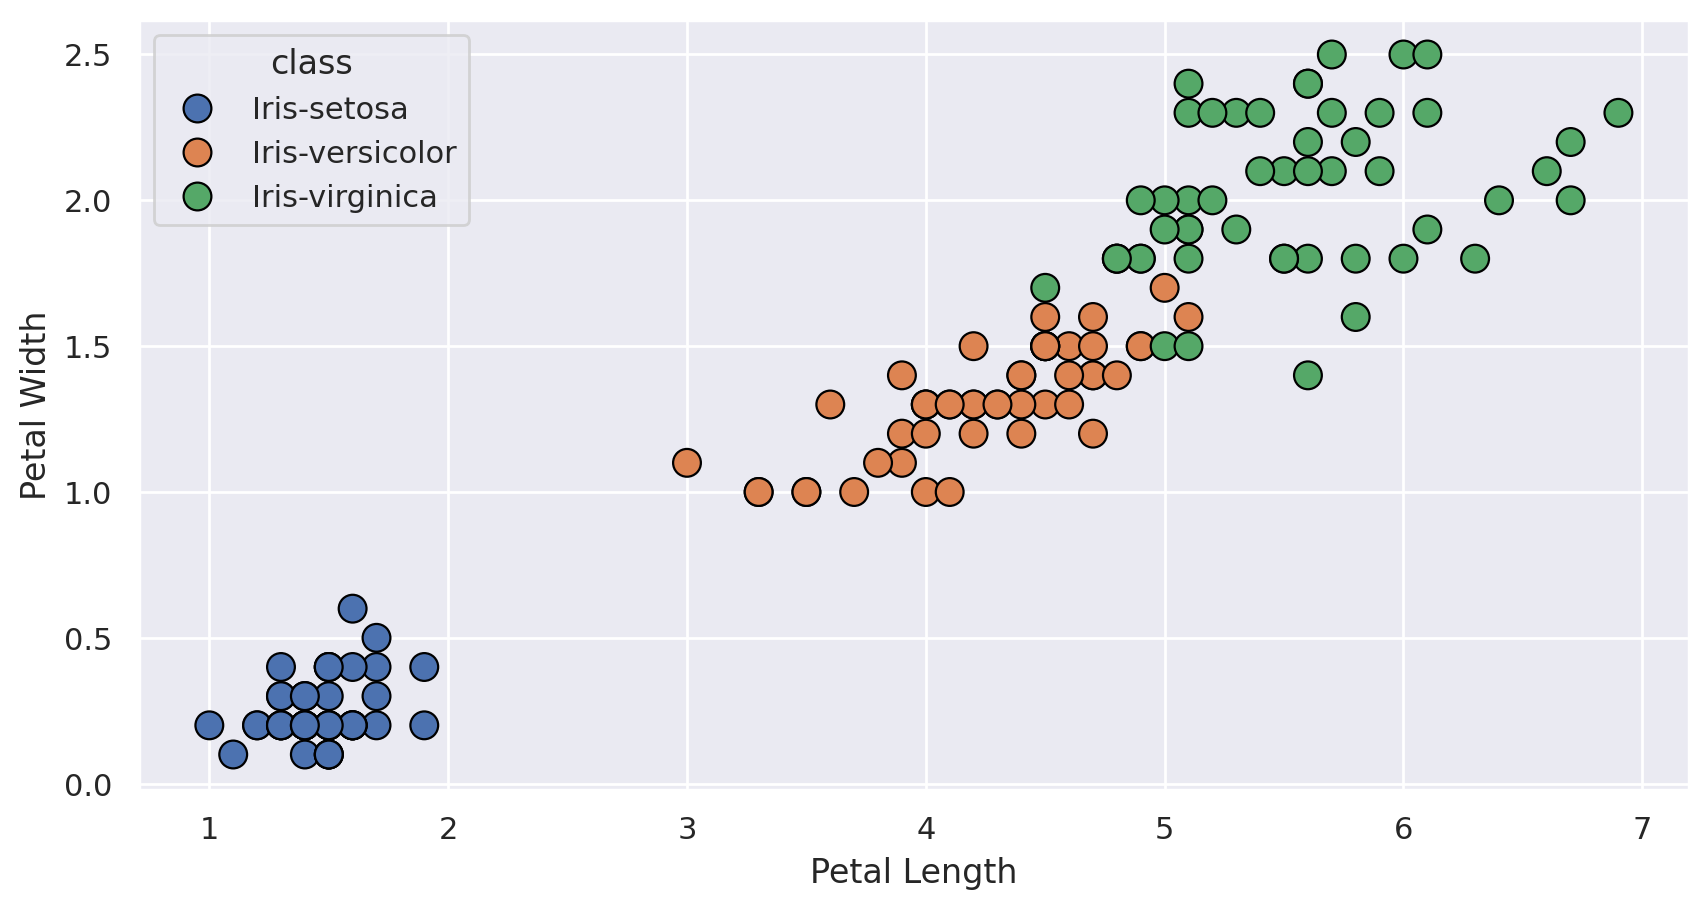

In [25]:
sns.scatterplot(x = df['PL'], y = df['PW'], hue=df['class'], s = 100, edgecolor = 'black')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')


In [26]:
x = df.iloc[:,:-1]
y = df["class"]


## PCA

In [27]:
sc = StandardScaler()

x = sc.fit_transform(x)
pd.DataFrame(x).describe()


,0,1,2,3
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-4.736952e-16,-6.631732e-16,3.315866e-16,-2.842171e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.438987e+00,-1.568735e+00,-1.444450e+00
25%,-9.006812e-01,-5.877635e-01,-1.227541e+00,-1.181504e+00
50%,-5.250608e-02,-1.249576e-01,3.362659e-01,1.332259e-01
75%,6.745011e-01,5.692513e-01,7.627586e-01,7.905908e-01
max,2.492019e+00,3.114684e+00,1.786341e+00,1.710902e+00


In [28]:
pca = PCA()
pcs = pca.fit_transform(x)


In [31]:
pca.explained_variance_ratio_


array([0.72770452, 0.23030523, 0.03683832, 0.00515193])

In [33]:
pd.DataFrame(pcs)


,0,1,2,3
0,-2.264542,0.505704,0.121943,-0.023073
1,-2.086426,-0.655405,0.227251,-0.103208
2,-2.367950,-0.318477,-0.051480,-0.027825
3,-2.304197,-0.575368,-0.098860,0.066311
4,-2.388777,0.674767,-0.021428,0.037397
...,...,...,...,...
145,1.870522,0.382822,-0.254532,-0.388890
146,1.558492,-0.905314,0.025382,-0.221322
147,1.520845,0.266795,-0.179277,-0.118903
148,1.376391,1.016362,-0.931405,-0.024146


In [34]:
np.cumsum(pca.explained_variance_ratio_)


array([0.72770452, 0.95800975, 0.99484807, 1.        ])

Text(0.5, 1.0, 'Scree Plot')

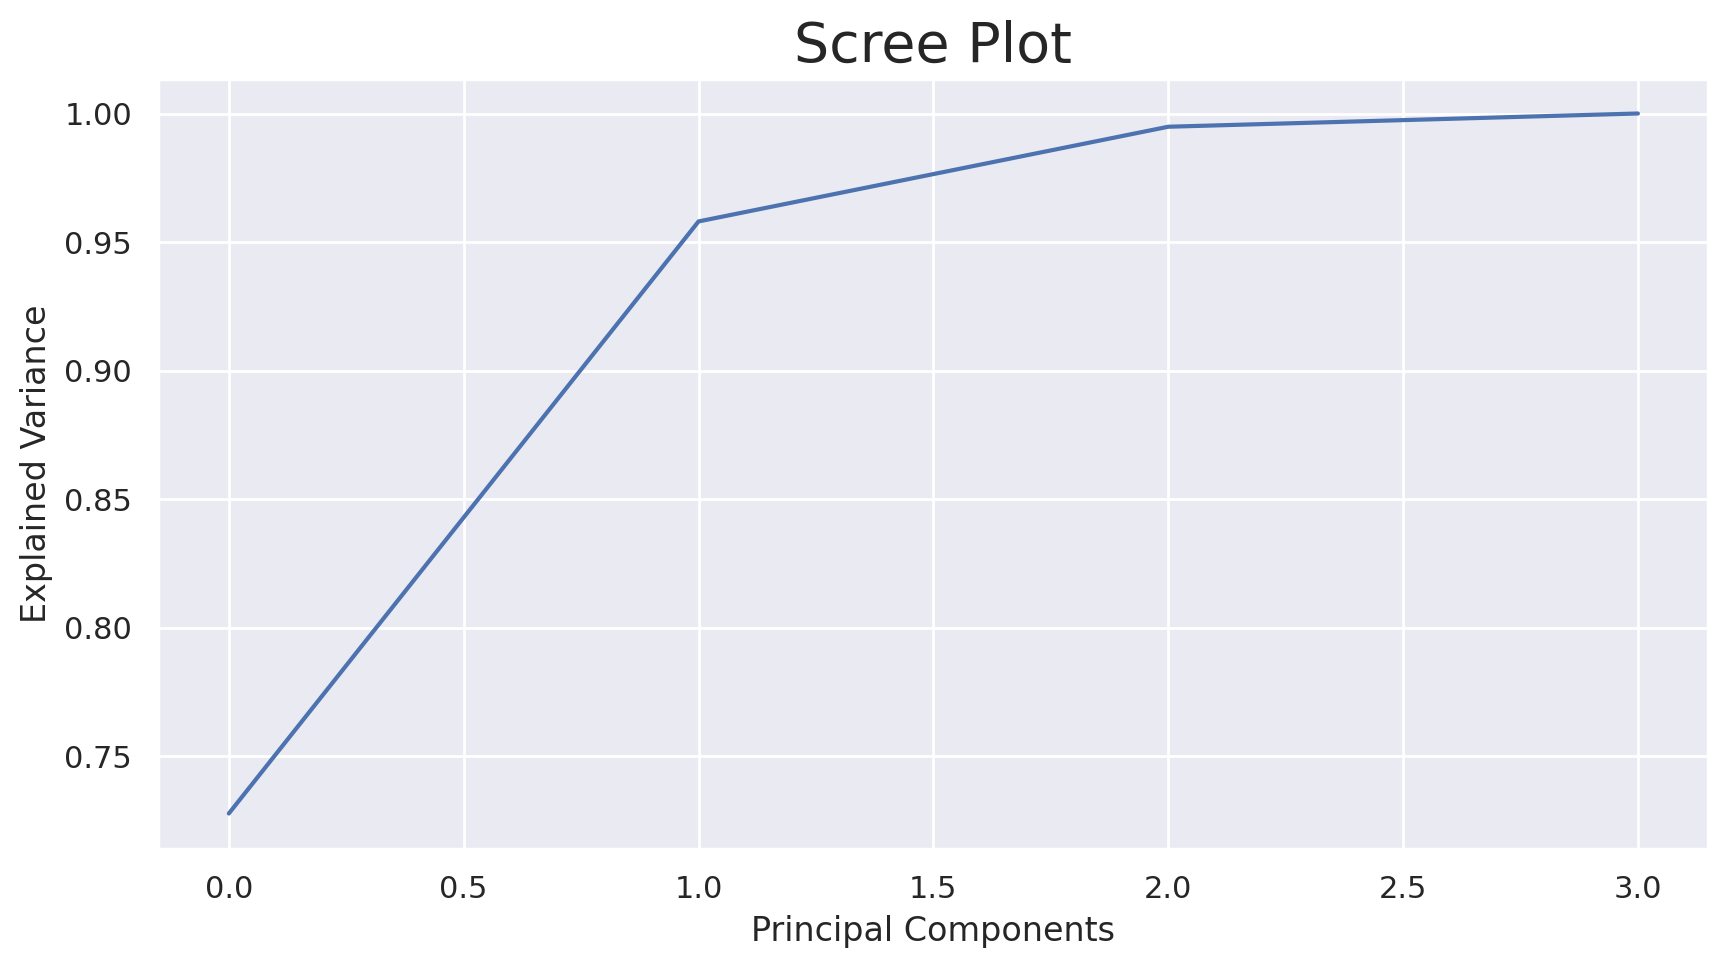

In [35]:
# plt.figure(figsize=(5,3),dpi=200)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
plt.title('Scree Plot', size = 20)


In [36]:
pca = PCA(n_components=2)
pcs = pca.fit_transform(x)
pcs


array([[-2.26454173e+00,  5.05703903e-01],
       [-2.08642550e+00, -6.55404729e-01],
       [-2.36795045e+00, -3.18477311e-01],
       [-2.30419716e+00, -5.75367713e-01],
       [-2.38877749e+00,  6.74767397e-01],
       [-2.07053681e+00,  1.51854856e+00],
       [-2.44571134e+00,  7.45626750e-02],
       [-2.23384186e+00,  2.47613932e-01],
       [-2.34195768e+00, -1.09514636e+00],
       [-2.18867576e+00, -4.48629048e-01],
       [-2.16348656e+00,  1.07059558e+00],
       [-2.32737775e+00,  1.58587455e-01],
       [-2.22408272e+00, -7.09118158e-01],
       [-2.63971626e+00, -9.38281982e-01],
       [-2.19229151e+00,  1.88997851e+00],
       [-2.25146521e+00,  2.72237108e+00],
       [-2.20275048e+00,  1.51375028e+00],
       [-2.19017916e+00,  5.14304308e-01],
       [-1.89407429e+00,  1.43111071e+00],
       [-2.33994907e+00,  1.15803343e+00],
       [-1.91455639e+00,  4.30465163e-01],
       [-2.20464540e+00,  9.52457317e-01],
       [-2.77416979e+00,  4.89517027e-01],
       [-1.

In [37]:
data = pd.DataFrame(pcs,columns=['PC1','PC2'])
data


,PC1,PC2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767
...,...,...
145,1.870522,0.382822
146,1.558492,-0.905314
147,1.520845,0.266795
148,1.376391,1.016362


In [39]:
data['Class'] = y
data


,PC1,PC2,Class
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa
...,...,...,...
145,1.870522,0.382822,Iris-virginica
146,1.558492,-0.905314,Iris-virginica
147,1.520845,0.266795,Iris-virginica
148,1.376391,1.016362,Iris-virginica
